In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
df = pd.read_csv('Kununu_Fashion_and_Retail.csv')
df.head(5)

,Unnamed: 0,user_uuid,company_name,profile_uuid,profile_name,profile_city,profile_industry_name_en,company_uuid,company_city,company_industry_name,...,meals,pension_plan,clothes,daycare,reachability,coaching,feedback_suggestion_text,feedback_positive_text,feedback_negative_text,profile_url
0,0,f3521258-c82f-45a3-816b-644c9b4e56db,Schüco International KG,3b42dda1-4273-4170-ac6e-1d0de2f61986,Schüco International KG,Bielefeld,Construction & Architecture,7a996ddb-0ad7-4b6c-953a-d1f782a1b451,Weißenfels,Retail & Consumer Goods,...,True,True,NaN,NaN,NaN,True,NaN,NaN,NaN,https://www.kununu.com/de/schueco-international
1,1,37599113-66f5-496f-842c-708991c503ef,iSi Automotive Austria GmbH,08a13af9-32f2-4200-a0f3-c6e086f3bbb4,iSi Automotive Austria GmbH,Wien,Manufacturing,946e5a83-a152-413e-8d94-ff42147feb34,Vienna,Manufacturing,...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,https://www.kununu.com/at/isi-automotive
2,2,62fa8e9f-d77c-4fe3-abe2-7732ae73de67,Heinrich Huhn GmbH & Co. KG,df80615f-4272-458a-9dfc-6409feec335a,Heinrich Huhn GmbH & Co. KG,Drolshagen,Manufacturing,9bf9ef63-e14c-4aec-9f59-9e822bc4074b,Drolshagen,Manufacturing,...,NaN,NaN,NaN,NaN,True,NaN,Er sollte endlich mal mit dem Gejammer aufhöre...,Keine!,"Wochenendarbeit, immer wieder wechselnde Schic...",https://www.kununu.com/de/heinrich-huhn
3,3,3755ac75-c33f-4a12-a7cf-c9ba04577f24,Komatsu Mining Germany GmbH,131ecf5e-1435-4c21-97bb-c6e1f4bdba9e,"Komatsu Mining Germany GmbH, Düsseldorf",Leverkusen,Mechanical & Industrial Engineering,9448ed39-9ffe-4fd7-b783-c773314bb37f,Düsseldorf,Manufacturing,...,NaN,NaN,NaN,NaN,NaN,NaN,Wen sie überhaupt was machen würden .da reicht...,Für nix machen ja nic,Zur Zeit alles falsch trotz vieler alten Kolle...,https://www.kununu.com/de/komatsu-mining-germa...
4,4,1e66365d-51ff-4735-b428-4b092f31cf83,Gabler Werbeagentur GmbH,c7e107e6-10f0-47b3-9092-3d740a92b011,Gabler Werbeagentur GmbH,Stuttgart,"Marketing, Advertising & PR",4e057fb8-ef91-4204-bc84-a88e4fb18d4e,Stuttgart,"Marketing, Advertising & PR",...,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,https://www.kununu.com/de/gabler-werbeagentur1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365406 entries, 0 to 365405
Data columns (total 70 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Unnamed: 0                           365406 non-null  int64  
 1   user_uuid                            365406 non-null  object 
 2   company_name                         365406 non-null  object 
 3   profile_uuid                         365406 non-null  object 
 4   profile_name                         365406 non-null  object 
 5   profile_city                         365403 non-null  object 
 6   profile_industry_name_en             365406 non-null  object 
 7   company_uuid                         365406 non-null  object 
 8   company_city                         342843 non-null  object 
 9   company_industry_name                365406 non-null  object 
 10  review_created_at                    365406 non-null  object 
 11  review_last_u

In [3]:
# Convert all words in the 'company_name' column to lowercase
df['company_name'] = df['company_name'].str.lower()


In [4]:
# Function to assign values based on company_name
def assign_company_name(row):
    if 'hugo boss' in row:
        return 'Hugo Boss'
    elif 'adidas' in row:
        return 'Adidas'
    elif 'lvmh' in row:
        return 'LVMH'
    elif 'ralph lauren' in row:
        return 'Ralph Lauren'
    elif 'porsche' in row:
        return 'Porsche'
    else:
        return None

# Create a new column based on the company_name values
df['company_group'] = df['company_name'].apply(assign_company_name)


In [5]:
df.reset_index(drop=True, inplace=True)
# Filter out rows where company_group is None
df_filtered = df[df['company_group'].notnull()]
df_filtered.reset_index(drop=True, inplace=True)
# Display the filtered DataFrame
df_filtered.head(5)

,Unnamed: 0,user_uuid,company_name,profile_uuid,profile_name,profile_city,profile_industry_name_en,company_uuid,company_city,company_industry_name,...,pension_plan,clothes,daycare,reachability,coaching,feedback_suggestion_text,feedback_positive_text,feedback_negative_text,profile_url,company_group
0,128,0cb44bd1-0104-445c-a975-b99c45001781,dr. ing. h.c. f. porsche ag,dd9996e3-17dd-4a87-ae39-c71de1482922,Dr. Ing. h.c. F. Porsche AG,Stuttgart-Zuffenhausen,Automotive,ac97887a-10e4-4579-9143-74a0258b604c,Stuttgart,Manufacturing,...,True,NaN,True,True,True,NaN,NaN,NaN,https://www.kununu.com/de/dr-ing-hc-f-porsche,Porsche
1,469,671f9883-7a0f-4752-9f8d-4d920838f795,dr. ing. h.c. f. porsche ag,dd9996e3-17dd-4a87-ae39-c71de1482922,Dr. Ing. h.c. F. Porsche AG,Stuttgart-Zuffenhausen,Automotive,ac97887a-10e4-4579-9143-74a0258b604c,Stuttgart,Manufacturing,...,NaN,NaN,NaN,True,NaN,Noch besser geht nicht.,Ich bin als Praktikant IN der Corona Krise zum...,NaN,https://www.kununu.com/de/dr-ing-hc-f-porsche,Porsche
2,559,86f2cea1-7fb2-4e55-8819-4912f9dc2cfe,dr. ing. h.c. f. porsche ag,dd9996e3-17dd-4a87-ae39-c71de1482922,Dr. Ing. h.c. F. Porsche AG,Stuttgart-Zuffenhausen,Automotive,ac97887a-10e4-4579-9143-74a0258b604c,Stuttgart,Manufacturing,...,True,NaN,NaN,NaN,True,NaN,NaN,NaN,https://www.kununu.com/de/dr-ing-hc-f-porsche,Porsche
3,653,2241e581-897b-488f-a9e3-877224bf8f5b,hugo boss ag,e7bab9db-ca2f-46c7-869a-1cdc1bea972c,HUGO BOSS AG,Metzingen,Textiles & Design,6fe20a30-2765-4b36-81e0-b402bc8d08ee,Metzingen,Textiles & Design,...,True,NaN,True,True,True,NaN,"Sehr angenehmes Arbeitsklima, sehr gute Firmen...",NaN,https://www.kununu.com/de/hugo-boss8,Hugo Boss
4,687,58187853-d1b7-42f1-a016-732c75f1429d,hugo boss ag,e7bab9db-ca2f-46c7-869a-1cdc1bea972c,HUGO BOSS AG,Metzingen,Textiles & Design,6fe20a30-2765-4b36-81e0-b402bc8d08ee,Metzingen,Textiles & Design,...,True,NaN,NaN,NaN,True,Prozesse unter den einzelnen Brand Gender Line...,New Work Methodik wird eingeführt,NaN,https://www.kununu.com/de/hugo-boss8,Hugo Boss


In [6]:
unique_values = df_filtered['company_group'].unique()
unique_values

array(['Porsche', 'Hugo Boss', 'Adidas', 'Ralph Lauren', 'LVMH'],
      dtype=object)

See the performance of logistic regression model in predicting

Logistic regression is well-suited for this task because it is designed to predict binary outcomes, such as classifying review scores into "high" and "low." It models the probability that a given input (e.g., cantine availability) falls into one of the two categories, making it effective for classification problems. Additionally, logistic regression provides interpretable results through coefficients, allowing us to understand the relationship between features and the predicted outcome. It also performs well with relatively small datasets and binary or categorical variables, which fits the structure of this dataset and the goal of predicting a binary outcome.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

data_clean = df_filtered

# Defining the dependent variable (target)
dependent_var = 'employment_is_recommended'

# Defining the independent variables (features)
independent_vars = [
    'employer_atmosphere_score', 'employer_communication_score', 'employer_teamwork_score',
    'employer_work_life_score', 'employer_leadership_score', 'employer_tasks_score',
    'employer_equality_score', 'employer_old_colleagues_score', 'employer_work_conditions_score',
    'employer_environment_score', 'employer_salary_score', 'employer_image_score', 
    'employer_career_score'
]

# Dropping rows with missing values in the relevant columns
data_clean = data_clean.dropna(subset=[dependent_var] + independent_vars)

# Converting the dependent variable from boolean to integers (True -> 1, False -> 0)
data_clean[dependent_var] = data_clean[dependent_var].astype(int)

# Defining the features (X) and the target variable (y)
X = data_clean[independent_vars]
y = data_clean[dependent_var]

# Converting the dependent variable to integers (True -> 1, False -> 0) for logistic regression
data_clean[dependent_var] = data_clean[dependent_var].astype(int)

# Splitting the dataset again with the updated dependent variable
X = data_clean[independent_vars]
y = data_clean[dependent_var]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Defining the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Training the logistic regression model
logreg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluating the model performance
report = classification_report(y_test, y_pred)

# Output the classification report
print(report)


              precision    recall  f1-score   support

           0       0.85      0.84      0.85       160
           1       0.96      0.96      0.96       625

    accuracy                           0.94       785
   macro avg       0.91      0.90      0.91       785
weighted avg       0.94      0.94      0.94       785



C:\Users\wuzhu\AppData\Local\Temp\ipykernel_16556\291948766.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[dependent_var] = data_clean[dependent_var].astype(int)
C:\Users\wuzhu\AppData\Local\Temp\ipykernel_16556\291948766.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[dependent_var] = data_clean[dependent_var].astype(int)


run logistic regression for overall data

In [11]:
import statsmodels.api as sm

# Add a constant (intercept) to the independent variables
# This is because in scikit-learn intercept is added by default, while in statsmodels intercept needs to be added manually
X_sm = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X_sm)
logit_result = logit_model.fit()

# Display the detailed report including coefficients, p-values, and more
logit_result.summary()


Optimization terminated successfully.
         Current function value: 0.144739
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     employment_is_recommended   No. Observations:                 3924
Model:                                 Logit   Df Residuals:                     3910
Method:                                  MLE   Df Model:                           13
Date:                       Mon, 07 Oct 2024   Pseudo R-squ.:                  0.7281
Time:                               18:47:43   Log-Likelihood:                -567.96
converged:                              True   LL-Null:                       -2088.5
Covariance Type:                   nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -10.5762      0.480    -22.027      0.000     -11.517      -9.635
employer_atmosphere_score          0.6165      0.101      6.101      0.000       0.418       0.815
employer_communication_score       0.5218      0.094      5.548      0.000       0.337       0.706
employer_teamwork_score            0.1288      0.084      1.525      0.127      -0.037       0.294
employer_work_life_score           0.2746      0.077      3.589      0.000       0.125       0.425
employer_leadership_score          0.4969      0.078      6.330      0.000       0.343       0.651
employer_tasks_score               0.2536      0.079      3.211      0.001       0.099       0.408
employer_equality_score            0.0490      0.072      0.682      0.495      -0.092       0.190
employer_old_colleagues_score     -0.0459      0.079     -0.584      0.560      -0.200       0.108
employer_work_conditions_score     0.0195      0.087      0.225      0.822      -0.151       0.190
employer_environment_score         0.0725      0.082      0.887      0.375      -0.088       0.233
employer_salary_score              0.4647      0.071      6.540      0.000       0.325       0.604
employer_image_score               0.2974      0.081      3.657      0.000       0.138       0.457
employer_career_score              0.3448      0.081      4.265      0.000       0.186       0.503
==================================================================================================
"""

Test the performance of logitic regression model trained on Hugo Boss data.

In [13]:
# Probit regression
# Fit the probit regression model
probit_model = sm.Probit(y, X_sm)
probit_result = probit_model.fit()

# Display the detailed report including coefficients, p-values, and more for probit regression
probit_result.summary()


Optimization terminated successfully.
         Current function value: 0.145676
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Probit Regression Results                              
=====================================================================================
Dep. Variable:     employment_is_recommended   No. Observations:                 3924
Model:                                Probit   Df Residuals:                     3910
Method:                                  MLE   Df Model:                           13
Date:                       Mon, 07 Oct 2024   Pseudo R-squ.:                  0.7263
Time:                               18:47:43   Log-Likelihood:                -571.63
converged:                              True   LL-Null:                       -2088.5
Covariance Type:                   nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -5.4647      0.223    -24.520      0.000      -5.902      -5.028
employer_atmosphere_score          0.3224      0.055      5.914      0.000       0.216       0.429
employer_communication_score       0.2605      0.050      5.215      0.000       0.163       0.358
employer_teamwork_score            0.0562      0.046      1.233      0.218      -0.033       0.146
employer_work_life_score           0.1310      0.041      3.197      0.001       0.051       0.211
employer_leadership_score          0.2886      0.042      6.914      0.000       0.207       0.370
employer_tasks_score               0.1161      0.042      2.763      0.006       0.034       0.198
employer_equality_score            0.0333      0.039      0.855      0.393      -0.043       0.110
employer_old_colleagues_score     -0.0358      0.042     -0.844      0.399      -0.119       0.047
employer_work_conditions_score     0.0092      0.047      0.197      0.844      -0.082       0.101
employer_environment_score         0.0485      0.043      1.126      0.260      -0.036       0.133
employer_salary_score              0.2595      0.038      6.886      0.000       0.186       0.333
employer_image_score               0.1544      0.043      3.595      0.000       0.070       0.239
employer_career_score              0.1768      0.044      4.042      0.000       0.091       0.263
==================================================================================================
"""

logistic regression for Hugo Boss

In [15]:
# Filtering the data for only "Hugo Boss" in the company_group
hugo_boss_data = data_clean[data_clean['company_group'] == 'Hugo Boss']

# Redefining the features (X) and target variable (y) for Hugo Boss
X_hugo = hugo_boss_data[independent_vars]
y_hugo = hugo_boss_data[dependent_var]

# Adding a constant (intercept) to the independent variables for Hugo Boss
X_hugo_sm = sm.add_constant(X_hugo)

# Fitting the logistic regression model for Hugo Boss
logit_hugo_model = sm.Logit(y_hugo, X_hugo_sm)
logit_hugo_result = logit_hugo_model.fit()

# Display the detailed report including coefficients, p-values, and more for the Hugo Boss logistic regression
logit_hugo_result.summary()


Optimization terminated successfully.
         Current function value: 0.133688
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                              
=====================================================================================
Dep. Variable:     employment_is_recommended   No. Observations:                  383
Model:                                 Logit   Df Residuals:                      369
Method:                                  MLE   Df Model:                           13
Date:                       Mon, 07 Oct 2024   Pseudo R-squ.:                  0.7505
Time:                               18:47:43   Log-Likelihood:                -51.202
converged:                              True   LL-Null:                       -205.22
Covariance Type:                   nonrobust   LLR p-value:                 5.016e-58
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -11.1211      1.664     -6.684      0.000     -14.382      -7.860
employer_atmosphere_score          1.0461      0.374      2.799      0.005       0.314       1.779
employer_communication_score       0.4242      0.382      1.111      0.267      -0.324       1.173
employer_teamwork_score           -0.1973      0.306     -0.644      0.519      -0.798       0.403
employer_work_life_score           0.0208      0.272      0.076      0.939      -0.513       0.555
employer_leadership_score          0.4842      0.288      1.680      0.093      -0.081       1.049
employer_tasks_score               0.8008      0.356      2.252      0.024       0.104       1.498
employer_equality_score           -0.4335      0.283     -1.532      0.126      -0.988       0.121
employer_old_colleagues_score      0.4412      0.281      1.571      0.116      -0.109       0.992
employer_work_conditions_score    -0.0355      0.302     -0.118      0.906      -0.628       0.557
employer_environment_score        -0.2110      0.344     -0.614      0.539      -0.885       0.463
employer_salary_score              0.6254      0.293      2.133      0.033       0.051       1.200
employer_image_score               0.2780      0.352      0.789      0.430      -0.412       0.968
employer_career_score              0.4906      0.334      1.469      0.142      -0.164       1.145
==================================================================================================
"""

Test the performance of logitic regression model trained on Hugo Boss data.

In [17]:
X_train_hugo, X_test_hugo, y_train_hugo, y_test_hugo = train_test_split(X_hugo, y_hugo, test_size=0.2, random_state=42)

# Defining the logistic regression model
logreg_hugo = LogisticRegression(max_iter=1000)

# Training the logistic regression model for Hugo Boss
logreg_hugo.fit(X_train_hugo, y_train_hugo)

# Making predictions on the test set for Hugo Boss
y_pred_hugo = logreg_hugo.predict(X_test_hugo)

# Evaluating the model performance for Hugo Boss
report_hugo = classification_report(y_test_hugo, y_pred_hugo)

# Output the classification report for Hugo Boss
print(report_hugo)

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       0.98      0.94      0.96        62

    accuracy                           0.94        77
   macro avg       0.88      0.93      0.90        77
weighted avg       0.94      0.94      0.94        77



probit regression for Hugo Boss

In [19]:
# Fit the probit regression model for Hugo Boss using statsmodels
probit_hugo_model = sm.Probit(y_hugo, X_hugo_sm)
probit_hugo_result = probit_hugo_model.fit()

# Display the detailed report including coefficients, p-values, and more for the Hugo Boss probit regression
probit_hugo_result.summary()


Optimization terminated successfully.
         Current function value: 0.132956
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Probit Regression Results                              
=====================================================================================
Dep. Variable:     employment_is_recommended   No. Observations:                  383
Model:                                Probit   Df Residuals:                      369
Method:                                  MLE   Df Model:                           13
Date:                       Mon, 07 Oct 2024   Pseudo R-squ.:                  0.7519
Time:                               18:47:44   Log-Likelihood:                -50.922
converged:                              True   LL-Null:                       -205.22
Covariance Type:                   nonrobust   LLR p-value:                 3.827e-58
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -5.8166      0.801     -7.258      0.000      -7.387      -4.246
employer_atmosphere_score          0.5634      0.204      2.762      0.006       0.164       0.963
employer_communication_score       0.2361      0.193      1.224      0.221      -0.142       0.614
employer_teamwork_score           -0.1542      0.159     -0.967      0.334      -0.467       0.158
employer_work_life_score          -0.0133      0.145     -0.092      0.927      -0.298       0.271
employer_leadership_score          0.2755      0.155      1.779      0.075      -0.028       0.579
employer_tasks_score               0.4466      0.192      2.326      0.020       0.070       0.823
employer_equality_score           -0.2494      0.158     -1.581      0.114      -0.559       0.060
employer_old_colleagues_score      0.2145      0.155      1.384      0.166      -0.089       0.518
employer_work_conditions_score    -0.0419      0.165     -0.254      0.800      -0.365       0.281
employer_environment_score        -0.0828      0.175     -0.472      0.637      -0.427       0.261
employer_salary_score              0.3886      0.163      2.385      0.017       0.069       0.708
employer_image_score               0.1532      0.188      0.816      0.414      -0.215       0.521
employer_career_score              0.2466      0.180      1.369      0.171      -0.106       0.600
==================================================================================================

Possibly complete quasi-separation: A fraction 0.16 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Here we set p-value threshhold equals to 0.05. We can see that coefficients for employer_atmosphere_score, employer_tasks_score and employer_salary_score are significant. In the following, we will compare those values beteween Hugo Boss and overall level.

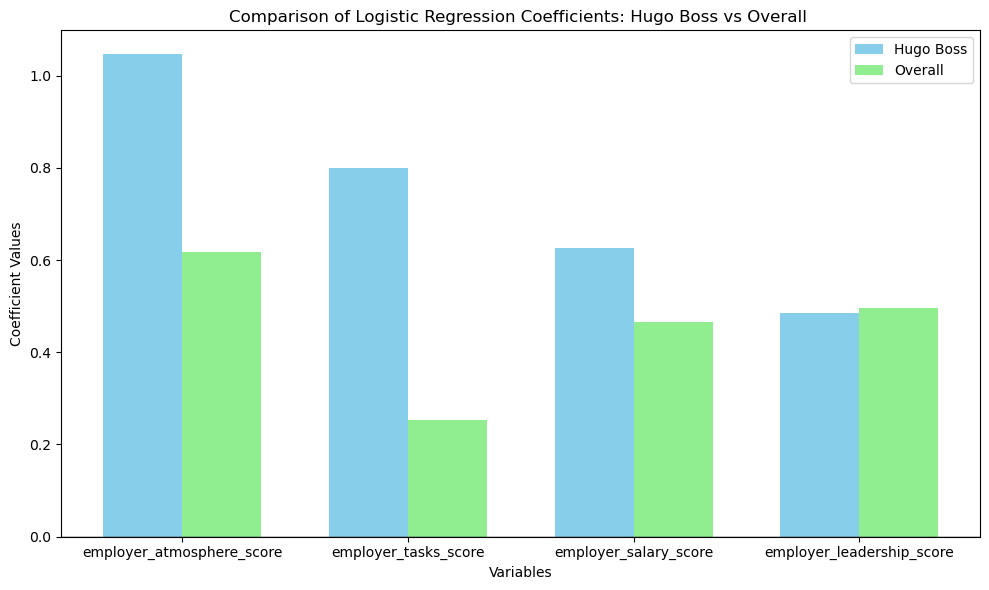

Optimization terminated successfully.
         Current function value: 0.145676
         Iterations 8


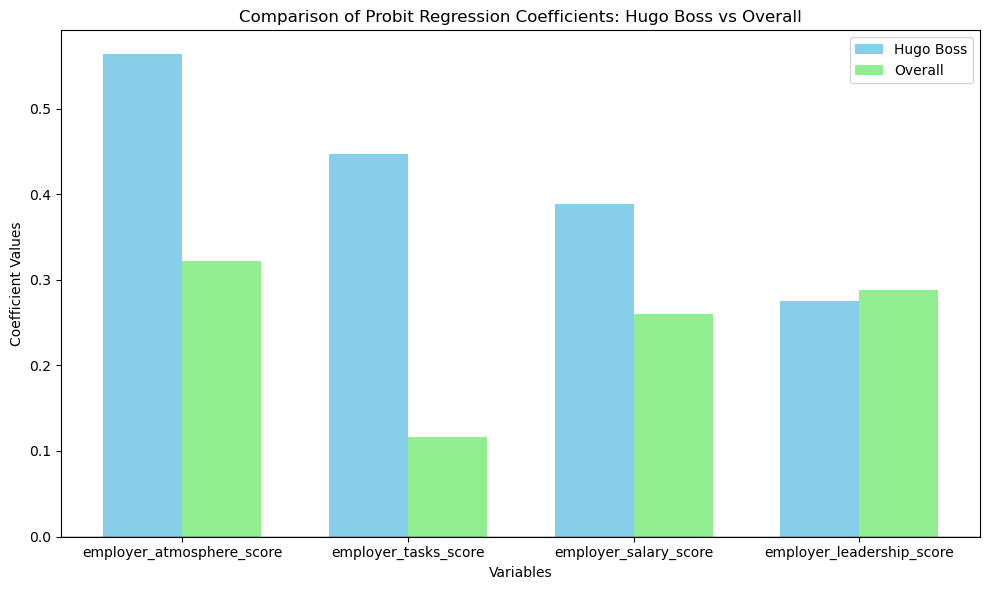

In [21]:
import matplotlib.pyplot as plt

# Extracting coefficients from both the overall and Hugo Boss logistic regression results
comparison_logit_df = pd.DataFrame({
    'Overall Coefficient': logit_result.params[['employer_atmosphere_score', 'employer_tasks_score', 'employer_salary_score','employer_leadership_score']],
    'Hugo Boss Coefficient': logit_hugo_result.params[['employer_atmosphere_score', 'employer_tasks_score', 'employer_salary_score','employer_leadership_score']]
})

# Removing the intercept from the dataframe used for visualization only
comparison_logit_df_no_const = comparison_logit_df.drop(index='const', errors='ignore')

# Re-indexing to ensure both Hugo Boss and overall models have the same variable set
comparison_logit_df_no_const = comparison_logit_df_no_const.dropna()

# Re-calculating the positions for the bars
index = np.arange(len(comparison_logit_df_no_const.index))
bar_width = 0.35
# Plotting a clustered bar chart to compare the coefficients, excluding the intercept from visualization
plt.figure(figsize=(10, 6))

# Plot for Hugo Boss
plt.bar(index - bar_width/2, comparison_logit_df_no_const['Hugo Boss Coefficient'], bar_width, label='Hugo Boss', color='skyblue')

# Plot for Overall
plt.bar(index + bar_width/2, comparison_logit_df_no_const['Overall Coefficient'], bar_width, label='Overall', color='lightgreen')

# Adding labels, title, and custom ticks
plt.xlabel('Variables')
plt.ylabel('Coefficient Values')
plt.title('Comparison of Logistic Regression Coefficients: Hugo Boss vs Overall ')
plt.xticks(index, comparison_logit_df_no_const.index, rotation=0)
plt.axhline(0, color='black', linewidth=1)  # Add a line at y=0 for reference
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Fit the probit model for the overall dataset (with intercept)
probit_overall_model = sm.Probit(y, X_sm)
probit_overall_result = probit_overall_model.fit()

# Extracting the specific coefficients for employer_atmosphere_score, employer_tasks_score, and employer_salary_score
probit_comparison_df = pd.DataFrame({
    'Hugo Boss Coefficient': probit_hugo_result.params[['employer_atmosphere_score', 'employer_tasks_score', 'employer_salary_score','employer_leadership_score']],
    'Overall Coefficient': probit_overall_result.params[['employer_atmosphere_score', 'employer_tasks_score', 'employer_salary_score','employer_leadership_score']]
})

# Re-indexing for the selected variables
probit_comparison_df = probit_comparison_df.dropna()

# Re-calculating the positions for the bars
index = np.arange(len(probit_comparison_df.index))
bar_width = 0.35

# Plotting a clustered bar chart to compare the coefficients, excluding the intercept from visualization
plt.figure(figsize=(10, 6))

# Plot for Hugo Boss
plt.bar(index - bar_width/2, probit_comparison_df['Hugo Boss Coefficient'], bar_width, label='Hugo Boss', color='skyblue')

# Plot for Overall
plt.bar(index + bar_width/2, probit_comparison_df['Overall Coefficient'], bar_width, label='Overall', color='lightgreen')

# Adding labels, title, and custom ticks
plt.xlabel('Variables')
plt.ylabel('Coefficient Values')
plt.title('Comparison of Probit Regression Coefficients: Hugo Boss vs Overall')
plt.xticks(index, probit_comparison_df.index, rotation=0)
plt.axhline(0, color='black', linewidth=1)  # Add a line at y=0 for reference
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

We can see that Hugo Boss employees care more about atmosphere, task and salary. Here we set p-value equal to 0.05, which means that coefficients for atmosphere, task and salary are significant. Let's look into the rank of Hugo Boss in these areas.

In [23]:
# Grouping the data by company_group and calculating the average employer_atmosphere_score for each group
average_atmosphere_score = data_clean.groupby('company_group')['employer_atmosphere_score'].mean().sort_values(ascending=False)

# Creating a DataFrame for better visibility
average_atmosphere_df = average_atmosphere_score.reset_index()
average_atmosphere_df

,company_group,employer_atmosphere_score
0,Porsche,4.137931
1,Hugo Boss,4.018277
2,Adidas,3.725389
3,Ralph Lauren,3.681818
4,LVMH,3.521739


In [24]:
average_tasks_score = data_clean.groupby('company_group')['employer_tasks_score'].mean().sort_values(ascending=False)

# Creating a DataFrame for better visibility
average_tasks_df = average_tasks_score.reset_index()
average_tasks_df

,company_group,employer_tasks_score
0,Hugo Boss,4.130548
1,Porsche,4.124695
2,Ralph Lauren,3.727273
3,LVMH,3.710145
4,Adidas,3.692573


In [25]:
# Grouping the data by company_group and calculating the average employer_salary_score for each group
average_salary_score = data_clean.groupby('company_group')['employer_salary_score'].mean().sort_values(ascending=False)

# Creating a DataFrame for better visibility
average_salary_df = average_salary_score.reset_index()

average_salary_df

,company_group,employer_salary_score
0,Porsche,4.021247
1,Adidas,3.606218
2,Hugo Boss,3.592689
3,Ralph Lauren,3.500000
4,LVMH,3.000000


In [26]:
# Grouping the data by company_group and calculating the average employer_leadership_score for each group
average_leadership_score = data_clean.groupby('company_group')['employer_leadership_score'].mean().sort_values(ascending=False)

# Creating a DataFrame for better visibility
average_leadership_df = average_leadership_score.reset_index()

average_leadership_df

,company_group,employer_leadership_score
0,Porsche,3.885754
1,Hugo Boss,3.579634
2,Adidas,3.490501
3,Ralph Lauren,3.454545
4,LVMH,3.347826
